In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({'A':[1,2,3,4,5],'B':['A','B','C','D','E']})

In [3]:
print(df)

   A  B
0  1  A
1  2  B
2  3  C
3  4  D
4  5  E


In [4]:
df_op = df.to_string(index = False) ##print output without index

In [18]:
df.loc[4]

A    5
B    E
Name: 4, dtype: object

In [5]:
print(df_op)

 A  B
 1  A
 2  B
 3  C
 4  D
 5  E


In [6]:
df = pd.DataFrame([[1, 2], [3, 4]], columns = ['a','b'])
df2 = pd.DataFrame([[5, 6], [7, 8]], columns = ['a','b'])

In [7]:
df

,a,b
0,1,2
1,3,4


In [8]:
df2

,a,b
0,5,6
1,7,8


In [9]:
df = df.append(df2).reset_index(drop = True)

In [10]:
df['sum'] =df['a']+df['b']

In [11]:
df

,a,b,sum
0,1,2,3
1,3,4,7
2,5,6,11
3,7,8,15


In [12]:
df2 = pd.DataFrame(['A','A','B','C'])

In [13]:
df['key'] = df2

In [14]:
df

,a,b,sum,key
0,1,2,3,A
1,3,4,7,A
2,5,6,11,B
3,7,8,15,C


In [15]:
##mean by values
df.groupby('key').mean().reset_index()

,key,a,b,sum
0,A,2,3,5
1,B,5,6,11
2,C,7,8,15


In [16]:
print("DF mean by row values")
print(df.groupby('key').mean().reset_index().to_string(index = False))

DF mean by row values
key  a  b  sum
  A  2  3    5
  B  5  6   11
  C  7  8   15


In [17]:
df.std()

a      2.581989
b      2.581989
sum    5.163978
dtype: float64

In [18]:
def adder(ele1,ele2):
       return ele1+ele2

dfx = pd.DataFrame(np.random.randn(5,3),columns=['col1','col2','col3'])
print(dfx)
dfx = dfx.pipe(adder,2)
print(dfx)
print("DF mean by columns")
print (dfx.apply(np.mean))

       col1      col2      col3
0 -0.675655  1.844651  0.531584
1  1.380054 -0.504845 -1.111083
2 -1.505606 -0.926583  1.684056
3  0.199422 -0.306672  0.883291
4 -0.880099  1.242026 -0.537444
       col1      col2      col3
0  1.324345  3.844651  2.531584
1  3.380054  1.495155  0.888917
2  0.494394  1.073417  3.684056
3  2.199422  1.693328  2.883291
4  1.119901  3.242026  1.462556
DF mean by columns
col1    1.703623
col2    2.269715
col3    2.290081
dtype: float64


In [19]:
print("DF mean by rows")
print(dfx.apply(np.mean, axis = 1))

DF mean by rows
0    2.566860
1    1.921376
2    1.750622
3    2.258680
4    1.941495
dtype: float64


In [20]:
print("DF column operations by map fn lambda")
dfx['col1'].map(lambda x: x*100)

DF column operations by map fn lambda


0    132.434539
1    338.005388
2     49.439359
3    219.942215
4    111.990135
Name: col1, dtype: float64

In [21]:
print("DF column operations by apply fn lambda")
dfx.apply(lambda x: x*100)

DF column operations by apply fn lambda


,col1,col2,col3
0,132.434539,384.465068,253.158395
1,338.005388,149.515540,88.891729
2,49.439359,107.341697,368.405626
3,219.942215,169.332768,288.329118
4,111.990135,324.202645,146.255636


In [22]:
N=20

data = pd.DataFrame({
   'A': pd.date_range(start='2016-01-01',periods=N,freq='D'),
   'x': np.linspace(0,stop=50,num=N),
   'y': np.random.rand(N),
   'C': np.random.choice(['Low','Medium','High'],N).tolist(),
   'D': np.random.normal(100, 10, size=(N)).tolist()
})
print(data)

#reindex the DataFrame
df_reindexed = data.reindex(index=[0,2,5], columns=['A', 'C', 'B'])

print (df_reindexed)

            A          x         y       C           D
0  2016-01-01   0.000000  0.076056  Medium   99.125860
1  2016-01-02   2.631579  0.322633  Medium   95.580840
2  2016-01-03   5.263158  0.159857     Low  123.904747
3  2016-01-04   7.894737  0.559336    High  100.186360
4  2016-01-05  10.526316  0.032876     Low  100.295137
5  2016-01-06  13.157895  0.016503    High  113.468045
6  2016-01-07  15.789474  0.040548     Low  109.859557
7  2016-01-08  18.421053  0.762789     Low   99.241231
8  2016-01-09  21.052632  0.857653  Medium   80.688702
9  2016-01-10  23.684211  0.212883  Medium  110.645537
10 2016-01-11  26.315789  0.208104  Medium   78.492366
11 2016-01-12  28.947368  0.264372  Medium   93.994858
12 2016-01-13  31.578947  0.634766  Medium   90.983276
13 2016-01-14  34.210526  0.964765     Low   91.270070
14 2016-01-15  36.842105  0.997469    High   94.787760
15 2016-01-16  39.473684  0.490546  Medium   95.487444
16 2016-01-17  42.105263  0.689569    High   95.358036
17 2016-01

In [23]:
df_reindexed.replace(np.nan,0)

,A,C,B
0,2016-01-01,Medium,0.0
2,2016-01-03,Low,0.0
5,2016-01-06,High,0.0


In [24]:
df3 = pd.DataFrame(np.random.randn(6,3),columns=['col1','col2','col3'])
df4 = pd.DataFrame(np.random.randn(2,3),columns=['col1','col2','col3'])

print(df3)
print(df4)


       col1      col2      col3
0  0.745125 -1.653986 -1.498677
1  0.012597  0.611391 -0.462555
2 -0.511679  0.495621  0.977931
3 -0.150856 -0.889972  0.296434
4 -0.602756  1.410448  0.960569
5 -0.473166  0.238700 -1.410399
       col1      col2      col3
0  0.854183 -0.254998  0.620146
1 -1.721783  0.140846  1.249612


In [25]:

# Now Fill the NAN's with preceding Values
print ("Data Frame with Forward Fill limiting to 1:")
df4 = df4.reindex_like(df3,method='ffill',limit=1)
print (df4)

Data Frame with Forward Fill limiting to 1:
       col1      col2      col3
0  0.854183 -0.254998  0.620146
1 -1.721783  0.140846  1.249612
2 -1.721783  0.140846  1.249612
3       NaN       NaN       NaN
4       NaN       NaN       NaN
5       NaN       NaN       NaN


In [26]:
df3 = df3.rename(columns = {'col1' : 'A', 'col2':'B','col3':'C'})

In [27]:
df3

,A,B,C
0,0.745125,-1.653986,-1.498677
1,0.012597,0.611391,-0.462555
2,-0.511679,0.495621,0.977931
3,-0.150856,-0.889972,0.296434
4,-0.602756,1.410448,0.960569
5,-0.473166,0.238700,-1.410399


In [28]:
df3.sort_values(by = 'A')

,A,B,C
4,-0.602756,1.410448,0.960569
2,-0.511679,0.495621,0.977931
5,-0.473166,0.238700,-1.410399
3,-0.150856,-0.889972,0.296434
1,0.012597,0.611391,-0.462555
0,0.745125,-1.653986,-1.498677


In [29]:
s = pd.DataFrame(['Tom', 'William Rick', 'John', 'Alber@t', np.nan, '1234','SteveSmith'])
s = s.replace(np.nan, "Unavailable")
#s['length'] = s.str.len(s[0])
print (s)

              0
0           Tom
1  William Rick
2          John
3       Alber@t
4   Unavailable
5          1234
6    SteveSmith


In [30]:
s['length'] = s[0].astype(str).map(len)

In [31]:
s

,0,length
0,Tom,3
1,William Rick,12
2,John,4
3,Alber@t,7
4,Unavailable,11
5,1234,4
6,SteveSmith,10


In [32]:
raw = pd.read_csv(r"/Users/jharnadohotia/my_Repo/real_estate.csv")

In [33]:
raw

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009
...,...,...,...
95,252460.400,549.80,2009
96,310522.592,1037.44,2009
97,383635.568,1504.75,2006
98,225145.248,648.29,2015


In [34]:
raw.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


In [35]:
raw['price'].mean()

292289.47015999985

In [36]:
raw['size'].agg([np.std,np.mean])

std     297.941951
mean    853.024200
Name: size, dtype: float64

In [37]:
raw1 = raw[raw['size']>200]

In [38]:
raw1.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


In [39]:
min(raw1['size'])

479.75

In [40]:
raw.apply(np.mean)

price    292289.47016
size        853.02420
year       2012.60000
dtype: float64

In [41]:
s = pd.Series([1,2,3,4,5])

In [42]:
s

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [43]:
s.ndim

1

In [44]:
d = {'Name':pd.Series(['Tom','James','Ricky','Vin','Steve','Smith','Jack']),
   'Age':pd.Series([25,26,25,23,30,29,23]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8])}

In [45]:
dfd = pd.DataFrame(d)

In [46]:
dfd

,Name,Age,Rating
0,Tom,25,4.23
1,James,26,3.24
2,Ricky,25,3.98
3,Vin,23,2.56
4,Steve,30,3.20
5,Smith,29,4.60
6,Jack,23,3.80


In [47]:
dfd.values

array([['Tom', 25, 4.23],
       ['James', 26, 3.24],
       ['Ricky', 25, 3.98],
       ['Vin', 23, 2.56],
       ['Steve', 30, 3.2],
       ['Smith', 29, 4.6],
       ['Jack', 23, 3.8]], dtype=object)

In [48]:
dfd.cumsum()

,Name,Age,Rating
0,Tom,25,4.23
1,TomJames,51,7.47
2,TomJamesRicky,76,11.45
3,TomJamesRickyVin,99,14.01
4,TomJamesRickyVinSteve,129,17.21
5,TomJamesRickyVinSteveSmith,158,21.81
6,TomJamesRickyVinSteveSmithJack,181,25.61


In [49]:
for key,value in dfd.iteritems():
    print(key,value)

Name 0      Tom
1    James
2    Ricky
3      Vin
4    Steve
5    Smith
6     Jack
Name: Name, dtype: object
Age 0    25
1    26
2    25
3    23
4    30
5    29
6    23
Name: Age, dtype: int64
Rating 0    4.23
1    3.24
2    3.98
3    2.56
4    3.20
5    4.60
6    3.80
Name: Rating, dtype: float64


In [50]:
for r_idx,row in dfd.iterrows():
    print(r_idx,row)

0 Name       Tom
Age         25
Rating    4.23
Name: 0, dtype: object
1 Name      James
Age          26
Rating     3.24
Name: 1, dtype: object
2 Name      Ricky
Age          25
Rating     3.98
Name: 2, dtype: object
3 Name       Vin
Age         23
Rating    2.56
Name: 3, dtype: object
4 Name      Steve
Age          30
Rating      3.2
Name: 4, dtype: object
5 Name      Smith
Age          29
Rating      4.6
Name: 5, dtype: object
6 Name      Jack
Age         23
Rating     3.8
Name: 6, dtype: object


In [51]:
for item in dfd.itertuples():
    print(item)

Pandas(Index=0, Name='Tom', Age=25, Rating=4.23)
Pandas(Index=1, Name='James', Age=26, Rating=3.24)
Pandas(Index=2, Name='Ricky', Age=25, Rating=3.98)
Pandas(Index=3, Name='Vin', Age=23, Rating=2.56)
Pandas(Index=4, Name='Steve', Age=30, Rating=3.2)
Pandas(Index=5, Name='Smith', Age=29, Rating=4.6)
Pandas(Index=6, Name='Jack', Age=23, Rating=3.8)


In [52]:
dflin = pd.DataFrame(np.linspace(0.5,stop=10,num=20))

In [53]:
dflin

,0
0,0.5
1,1.0
2,1.5
3,2.0
4,2.5
5,3.0
6,3.5
7,4.0
8,4.5
9,5.0


In [54]:
dfs = pd.read_csv('superstore_dataset2011-2015 2.csv', encoding= 'unicode_escape')

In [56]:
dfs.columns = dfs.columns.str.replace(' ', '')

In [57]:
dfs

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


In [58]:
dfs.Segment.unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [59]:
dfs.groupby('Segment').sum()

,RowID,PostalCode,Sales,Quantity,Discount,Profit,ShippingCost
Segment,,,,,,,
Consumer,679274966,288878609.0,6.507949e+06,92157,3808.042,749239.78206,697300.64
Corporate,395087151,164536330.0,3.824698e+06,53565,2205.284,441208.32866,410474.46
Home Office,240995578,98157713.0,2.309855e+06,32590,1316.402,277009.18056,245045.59


In [60]:
dfs.groupby('Segment').agg({'Quantity': {'sum', 'mean'}, 'Profit': {'sum', 'mean'} })

Quantity                  Profit           
                 sum      mean           sum       mean
Segment                                                
Consumer       92157  3.475262  749239.78206  28.254008
Corporate      53565  3.471709  441208.32866  28.596042
Home Office    32590  3.488173  277009.18056  29.648847

In [61]:
pd.pivot_table(dfs, 
               values=['Quantity', 'Profit'], 
               index=['Segment'], 
               aggfunc={'Quantity': {'sum', 'mean'}, 'Profit': {'sum', 'mean'} })

Profit                Quantity         
                  mean           sum      mean      sum
Segment                                                
Consumer     28.254008  749239.78206  3.475262  92157.0
Corporate    28.596042  441208.32866  3.471709  53565.0
Home Office  29.648847  277009.18056  3.488173  32590.0

**Chi Squared Test**

If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.
If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent.

alpha = 0.05

Output:
- chi2: The test statistic
- pval: The p-value of the test
- dof: Degrees of freedom
- expected: The expected frequencies, based on the marginal sums of the table

In [62]:
Fitness = pd.DataFrame({'Low fitness Level' : [113, 135, 91, 152],
                 'Medium-low fitness level': [113, 135, 91, 152],
                 'Medium-high fitness level':[110, 172, 86, 124],
                 'High fitness level': [159, 190, 65, 73]},
                       index = ["Never smoked", "Former smokers", "1 to 9 cigarettes daily", ">=10 cigarettes daily"]
)

In [63]:
Fitness

,Low fitness Level,Medium-low fitness level,Medium-high fitness level,High fitness level
Never smoked,113,113,110,159
Former smokers,135,135,172,190
1 to 9 cigarettes daily,91,91,86,65
>=10 cigarettes daily,152,152,124,73


In [64]:
import scipy as sc
from scipy.stats import chi2_contingency,chi2

In [65]:
c, pval, dof, expected = chi2_contingency(Fitness)

In [67]:
pval ## Much much lesser than 0.05 - Reject Null, Significant Result

6.33878061498073e-11

In [68]:
dof

9

In [69]:
expected

array([[123.93931668, 123.93931668, 124.19173891, 122.92962774],
       [158.24171341, 158.24171341, 158.56399796, 156.95257522],
       [ 83.37735849,  83.37735849,  83.54716981,  82.69811321],
       [125.44161142, 125.44161142, 125.69709332, 124.41968383]])

In [70]:
subjects = pd.DataFrame(
    [
        [25,46,15],
        [15,44,15],
        [10,10,20]
    ],
    index=['Biology','Chemistry','Physics'],
    columns=['Math SL AA','Math SL AI','Math HL'])
subjects

,Math SL AA,Math SL AI,Math HL
Biology,25,46,15
Chemistry,15,44,15
Physics,10,10,20


In [71]:
c, pval, dof, expected = chi2_contingency(subjects)

In [72]:
significance = 0.05
p = 1 - significance

In [73]:
critical_value = chi2.ppf(p, dof)

In [74]:
critical_value

9.487729036781154

## Statistical Tests on SuperStore DataSets

In [75]:
dfs

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


**One categorical - sample proportion test**

Let's do the test for category - Segment

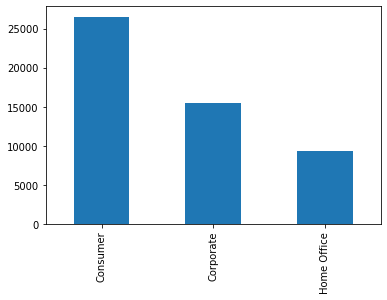

In [76]:
dfs['Segment'].value_counts().plot(kind='bar')

**Two categorical - Chi Squared**

Let's do the test for categories - Segment, ShipMode

In [78]:
contigency= pd.crosstab(dfs['Segment'], dfs['ShipMode']) 
contigency

ShipMode,First Class,Same Day,Second Class,Standard Class
Segment,,,,
Consumer,3918,1467,5257,15876
Corporate,2245,728,3198,9258
Home Office,1342,506,1854,5641


In [79]:
alpha = 0.05

In [81]:
c, pval, dof, expected = chi2_contingency(contigency)

In [82]:
pval

0.005581770901920851

At significance level of 0.05 - null hypothesis is rejected, however at significance of 0.001 - we can't reject the null... 

In [86]:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f',
'h'],columns=['one', 'two', 'three'])

df = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])

print (df['one'].isnull())


a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool


In [87]:
df

,one,two,three
a,-0.847200,-0.659173,-2.316817
b,NaN,NaN,NaN
c,-0.054069,-0.851267,1.141063
d,NaN,NaN,NaN
e,-0.877693,-0.138406,0.380489
f,0.222636,0.267233,-0.716561
g,NaN,NaN,NaN
h,-1.351934,-0.534209,-0.487916


In [88]:
df.fillna(0)

,one,two,three
a,-0.847200,-0.659173,-2.316817
b,0.000000,0.000000,0.000000
c,-0.054069,-0.851267,1.141063
d,0.000000,0.000000,0.000000
e,-0.877693,-0.138406,0.380489
f,0.222636,0.267233,-0.716561
g,0.000000,0.000000,0.000000
h,-1.351934,-0.534209,-0.487916


In [90]:
df.fillna(method='pad')

,one,two,three
a,-0.847200,-0.659173,-2.316817
b,-0.847200,-0.659173,-2.316817
c,-0.054069,-0.851267,1.141063
d,-0.054069,-0.851267,1.141063
e,-0.877693,-0.138406,0.380489
f,0.222636,0.267233,-0.716561
g,0.222636,0.267233,-0.716561
h,-1.351934,-0.534209,-0.487916


In [91]:
df.dropna()

,one,two,three
a,-0.847200,-0.659173,-2.316817
c,-0.054069,-0.851267,1.141063
e,-0.877693,-0.138406,0.380489
f,0.222636,0.267233,-0.716561
h,-1.351934,-0.534209,-0.487916


In [98]:
df.replace(np.nan,0)

,one,two,three
a,-0.847200,-0.659173,-2.316817
b,0.000000,0.000000,0.000000
c,-0.054069,-0.851267,1.141063
d,0.000000,0.000000,0.000000
e,-0.877693,-0.138406,0.380489
f,0.222636,0.267233,-0.716561
g,0.000000,0.000000,0.000000
h,-1.351934,-0.534209,-0.487916


In [99]:
dfs

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


In [100]:
print (dfs.loc[[1,3,5],['OrderID','Segment']])

           OrderID      Segment
1    IN-2011-47883     Consumer
3  IT-2011-3647632  Home Office
5    IN-2011-47883     Consumer


In [103]:
print (dfs.loc[0:5,['OrderID','Segment']])

           OrderID      Segment
0     AG-2011-2040     Consumer
1    IN-2011-47883     Consumer
2     HU-2011-1220     Consumer
3  IT-2011-3647632  Home Office
4    IN-2011-47883     Consumer
5    IN-2011-47883     Consumer


## SQLAlchemy

In [105]:
from sqlalchemy import create_engine


# Create the db engine
engine = create_engine('sqlite:///:memory:')

# Store the dataframe as a table
dfs.to_sql('data_table', engine)

# Query 1 on the relational table
res1 = pd.read_sql_query('SELECT OrderID,Segment FROM data_table LIMIT 6', engine)
print(res1)
print('')

           OrderID      Segment
0     AG-2011-2040     Consumer
1    IN-2011-47883     Consumer
2     HU-2011-1220     Consumer
3  IT-2011-3647632  Home Office
4    IN-2011-47883     Consumer
5    IN-2011-47883     Consumer



In [106]:
# Query 2 on the relational table
res2 = pd.read_sql_query('SELECT Segment,sum(Sales) FROM data_table group by Segment', engine)
print(res2)

       Segment    sum(Sales)
0     Consumer  6.507949e+06
1    Corporate  3.824698e+06
2  Home Office  2.309855e+06


**Insert another row - Syntax**

sql.execute('INSERT INTO data_table VALUES(?,?,?,?,?,?)', engine, params=[('','','','','','')])

**Delete from table**

sql.execute('Delete from data_table where column_name = (?) ', engine,  params=[('')])

## DateTime

In [107]:
import datetime

print ('The Date Today is  :', datetime.datetime.today())

date_today = datetime.date.today()
print (date_today)
print ('This Year   :', date_today.year)
print ('This Month    :', date_today.month)
print ('Month Name:',date_today.strftime('%B'))
print ('This Week Day    :', date_today.day)
print ('Week Day Name:',date_today.strftime('%A'))

The Date Today is  : 2021-02-03 21:23:34.042100
2021-02-03
This Year   : 2021
This Month    : 2
Month Name: February
This Week Day    : 3
Week Day Name: Wednesday


## Data Processing

[ 0  1  2  3  4  5  6  7  8  9 10]
[  0   1   4   9  16  25  36  49  64  81 100]


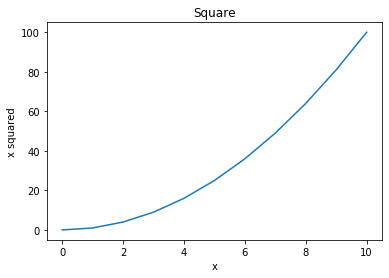

In [117]:
import matplotlib.pyplot as plt

x = np.arange(0,11)
print(x)
y = x**2 
print (y)
#Simple Plot
plt.title("Square") 
plt.xlabel("x") 
plt.ylabel("x squared") 
plt.plot(x,y)